<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2022

## Importación de librerias necesarias

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

#1. `pandas` es una librería de Python que proporciona estructuras de datos y
# herramientas de análisis de datos de alto rendimiento para trabajar con conjuntos de datos tabulares.
#. `numpy` es una librería de Python que proporciona estructuras de datos y
# herramientas para trabajar con matrices y vectores numéricos para realizar cálculos numéricos y operaciones matemáticas de manera eficiente.
# `matplotlib` es una librería de Python para crear gráficos y visualizaciones de datos, útil 
# para crear gráficos de líneas, de barras, de dispersión, histogramas, entre otros.
#`seaborn` es una librería de Python para visualizar datos estadísticos, proporcionando una interfaz fácil de usar para 
# crear gráficos estadísticos complejos como diagramas de caja, gráficos de violín, gráficos de densidad y mapas de calor.
#`sklearn` es una librería de Python para aprendizaje automático que proporciona herramientas para construir 
# modelos de aprendizaje automático, realizar validación cruzada, preprocesar datos y evaluar modelos.
#`preprocessing` es un módulo de `sklearn` que proporciona herramientas para preprocesar los datos antes de construir 
# un modelo de aprendizaje automático, incluyendo normalización, estandarización, codificación y escalado de datos.
#`train_test_split` es una función de `sklearn` que se utiliza para dividir un conjunto de datos en dos subconjuntos: 
# uno para entrenar el modelo y otro para evaluar su desempeño.
#`LinearRegression` es una clase de `sklearn` que se utiliza para construir un modelo de regresión lineal.
#`mean_squared_error` es una función de `sklearn.metrics` que se utiliza para calcular el error cuadrático medio entre
# las predicciones de un modelo y las verdaderas etiquetas de los datos.
#`r2_score` es una función de `sklearn.metrics` que se utiliza para calcular el coeficiente de determinación R^2 de un modelo de regresión.
# `PolynomialFeatures` es una clase de `sklearn.preprocessing` que se utiliza para generar características
# polinómicas a partir de un conjunto de características existente, útil para construir modelos de regresión polinómica.

## Cargar el Dataset

In [27]:
df=pd.read_csv('./Laboratorio_dataset_car.csv', sep=';')
##Caracterización
#La base de datos cuenta con 1750 instancias  y 7 variables 



## Explique el problema a resolver. 
Descripción del problema. Tipo de problema (justifique). Variable objetivo, variables de entrada. Utilidad de su posible solución. Elementos adicionales que considere relevantes:

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [28]:
#Código que responde a la descripción anterior
df.shape

(1750, 7)

In [29]:
#Código que responde a la descripción anterior (incorpore las lineas de code necesarias. Describa cadas sentencia de código)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB


En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [30]:
#Código que realice las transformaciones necesarias para poder realizar los procesos de modelación. Ej.One hot enconding
df['Buying'].value_counts()
#indica el valor del auto
#variable ordinal que cuenta con un orden vhigh,med,low.hight
#de tipo de dato entero 
#existen 443 datos con notación vhigh
#existen 438 datos con notación med
#existen 437 datos con notación low
#existen 432 datos con notacion high
#existen un total de 1750 datos

vhigh    443
med      438
low      437
high     432
Name: Buying, dtype: int64

In [31]:
df['class'].value_counts()#indica la clase de auto y si nivel de accesibilidad
#variable ordinal que cuenta con un orden unacc,acc,good,vgood
#de tipo de dato entero 
#existen 1215 datos con notación unacc
#existen 390 datos con notación acc
#existen 75 datos con notación good
#existen 70 datos con notacion vgood
#existen un total de 1750 datos

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

In [32]:
df['Maintenance'].value_counts()
#indica el mantenimiento que tienen 
#variable ordinal que cuenta con un orden vhigh,med,low.hight
#de tipo de dato entero 
#existen 437 datos con notación vhigh
#existen 434 datos con notación med
#existen 447 datos con notación low
#existen 432 datos con notacion high
#existen un total de 1750 datos

low      447
vhigh    437
med      434
high     432
Name: Maintenance, dtype: int64

In [33]:
df['Doors'].value_counts()
#indica el número de puertas 
#variable ordinal que cuenta con un orden vhigh,med,low.hight
#de tipo de dato entero 
#existen 444 datos con notación 2
#existen 437 datos con notación de 5 o más
#existen 435 datos con notación 3
#existen 434 datos con notacion 4
#existen un total de 1750 datos

2        444
5more    437
3        435
4        434
Name: Doors, dtype: int64

In [34]:
df['Person'].value_counts()
#Indica el número de persona que caben
#variable ordinal que cuenta con un orden 4,más y 2
#de tipo de dato entero 
#existen 587 datos con notación 4
#existen 585 datos con notación more
#existen 578 datos con notación 2
#existen un total de 1750 datos

4       587
more    585
2       578
Name: Person, dtype: int64

In [35]:
df['lug_boot'].value_counts()
#variable ordinal que cuenta con un orden big,med,small
#de tipo de dato entero 
#existen 585 datos con notación big
#existen 583 datos con notación med
#existen 582 datos con notación small
#existen un total de 1750 datos

big      585
med      583
small    582
Name: lug_boot, dtype: int64

In [36]:
df['safety'].value_counts()
#Indica la seguridad 
#variable ordinal que cuenta con un orden med,low.hight
#de tipo de dato entero 
#existen 582 datos con notación med
#existen 578 datos con notación low
#existen 590 datos con notacion high
#existen un total de 1750 datos

high    590
med     582
low     578
Name: safety, dtype: int64

In [37]:
df['class'].value_counts()
#indica la clase de la variable
#variable ordinal que cuenta con un orden unacc,acc,good,vgood
#de tipo de dato entero 
#existen 1215 datos con notación unacc
#existen 390 datos con notación acc
#existen 75 datos con notación good
#existen 70 datos con notacion vgood
#existen un total de 1750 datos

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

In [38]:
# una descripcion de como estan distribuidos los datos 
# la primera fila hace el recuento de todas las instancias
# unique posibles valores que puedan obtener
# top y freq es cual se repite con mayor frecuencia
 
df.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
count,1750,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3,4
top,vhigh,low,2,4,big,high,unacc
freq,443,447,444,587,585,590,1215


<Axes: >

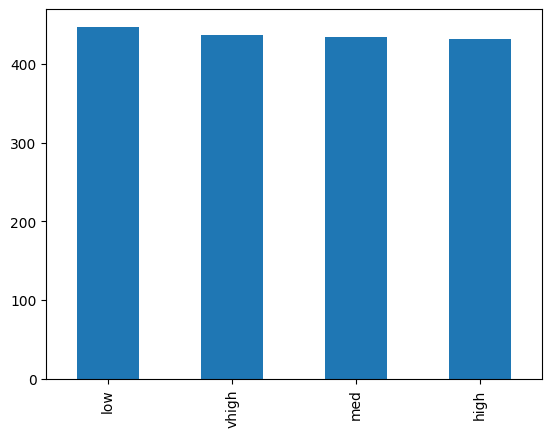

In [39]:
df.Maintenance.value_counts().plot.bar()
#variable cualitativa ordinal

<Axes: >

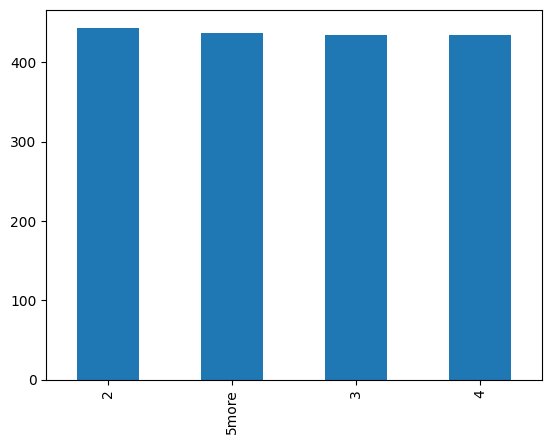

In [40]:
df.Doors.value_counts().plot.bar()
#variable cuantitativa discreta

<Axes: >

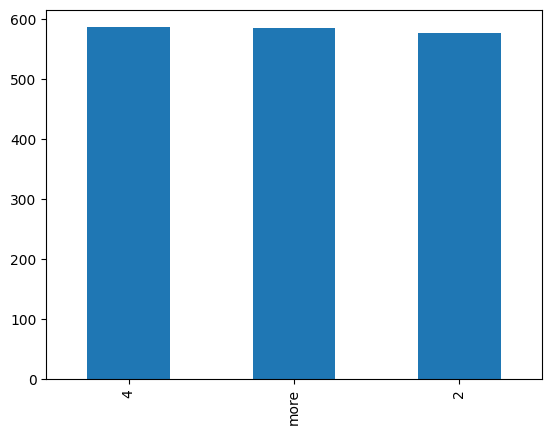

In [41]:
df.Person.value_counts().plot.bar()
#variable cualitativa discreta

<Axes: >

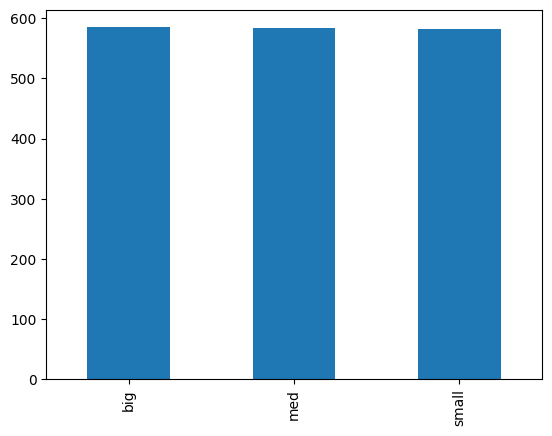

In [42]:
df.lug_boot.value_counts().plot.bar()
#variable cualitativa ordinal

<Axes: >

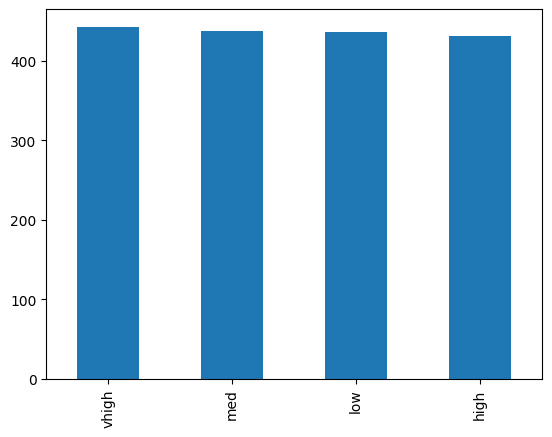

In [43]:
df.Buying.value_counts().plot.bar()
#sirve para observar el balance de los datos
#variable cuantitativa ordinal

<Axes: >

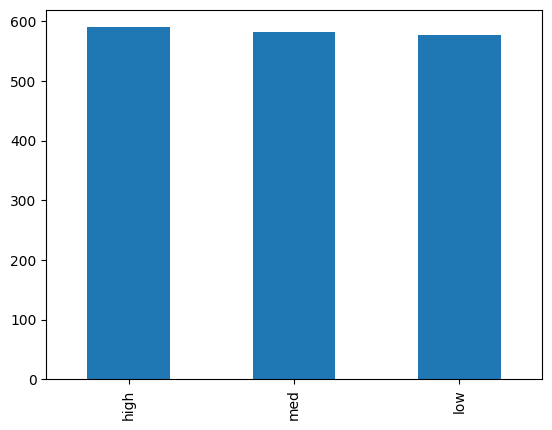

In [44]:
df.safety.value_counts().plot.bar()
#variable cuantitativa ordinal

<Axes: xlabel='class', ylabel='count'>

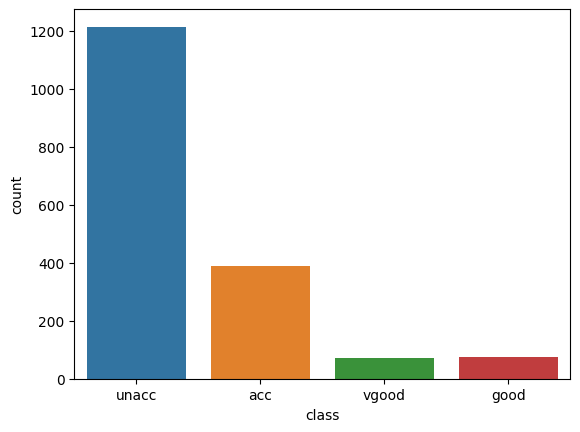

In [45]:
# es el codigo de la funcion objetivo  para ver el balance de los datos que tiene  y en este caso se llama class
#
sns.countplot(x='class', data=df)

In [46]:
x=df.drop('class',axis=1)
y=df['class']
print(y)
x.shape,y.shape
#en x cuenta todas las variables excepto class
#y en Y estan  todas las instancias de class

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1745    vgood
1746    vgood
1747    unacc
1748     good
1749    vgood
Name: class, Length: 1750, dtype: object


((1750, 6), (1750,))

## División del dataset en datos de entrenamiento y datos de test 

In [47]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evluación planeada. Describa cuál es.
x_train, x_text ,Y_train,y_test = train_test_split(x,y,test_size=0.28, random_state=30,shuffle=True,stratify=y)
from sklearn.preprocessing import OrdinalEncoder
enconder = OrdinalEncoder()
x_etrain = enconder.fit_transform(x_train)
x_etest =enconder.transform(x_text)
print(enconder.categories_)
print(x_etrain[:5])
print(x_train[:5])
print(x_etest[:5])
print(x_text[:5])


[array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['2', '3', '4', '5more'], dtype=object), array(['2', '4', 'more'], dtype=object), array(['big', 'med', 'small'], dtype=object), array(['high', 'low', 'med'], dtype=object)]
[[0. 2. 1. 1. 1. 2.]
 [1. 0. 0. 2. 2. 0.]
 [0. 1. 2. 2. 0. 0.]
 [1. 2. 3. 0. 1. 0.]
 [3. 1. 1. 1. 2. 0.]]
     Buying Maintenance  Doors Person lug_boot safety
699    high         med      3      4      med    med
1441    low        high      2   more    small   high
847    high         low      4   more      big   high
1615    low         med  5more      2      med   high
371   vhigh         low      3      4    small   high
[[1. 2. 0. 1. 1. 0.]
 [3. 1. 3. 0. 0. 0.]
 [0. 2. 2. 0. 1. 0.]
 [2. 1. 3. 1. 0. 0.]
 [2. 2. 2. 1. 0. 2.]]
     Buying Maintenance  Doors Person lug_boot safety
1543    low         med      2      4      med   high
423   vhigh         low  5more      2      big   high
718    high   

## Ajuste de los modelos de clasificación propuestos

Justifique la selección de las dos propuestas de modelación seleccionadas:

In [55]:
#Código de ajuste del modelo de clasificación 1
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=10,random_state=45)
#fit the model 
dt.fit(x_etrain,Y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=45)

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_etrain, Y_train)

yrf_pred = rf.predict(x_etest)



print(yrf_pred[:5])

print(y_test[:5])

['good' 'unacc' 'unacc' 'vgood' 'acc']
1543     good
423     unacc
718     unacc
1303    vgood
1161      acc
Name: class, dtype: object


In [57]:
#Código de ajuste del modelo de clasificación 2
#import warnings filter 
from warnings import simplefilter
#ignore all futura warnings
simplefilter(action='ignore', category=FutureWarning)
#predict the target variable
ydt_pred=dt.predict(x_etest)
#muestra las 5 primeras predicciones
print(y[:5])
#muestra los primeros 5 valores reales
print(ydt_pred[:5])


0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object
['good' 'unacc' 'unacc' 'vgood' 'acc']


## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión


0.9694501018329938


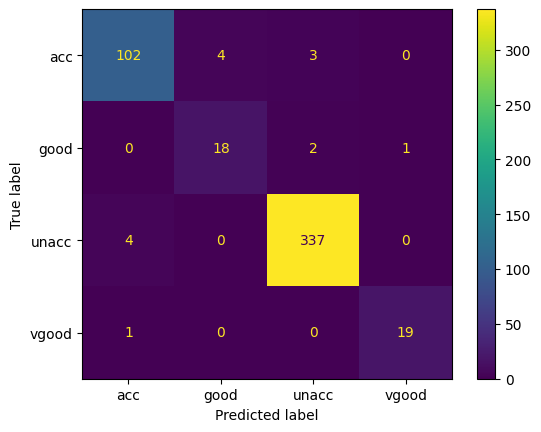

              precision    recall  f1-score   support

         acc       0.95      0.94      0.94       109
        good       0.82      0.86      0.84        21
       unacc       0.99      0.99      0.99       341
       vgood       0.95      0.95      0.95        20

    accuracy                           0.97       491
   macro avg       0.93      0.93      0.93       491
weighted avg       0.97      0.97      0.97       491



In [58]:
#Código para mostrar la evaluación del modelo de clasificación 1

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print(accuracy_score(y_test, ydt_pred))
#muestra el grafico de la matriz
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,ydt_pred,labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dt.classes_)
disp.plot()
plt.show()
from sklearn.metrics import classification_report 
print(classification_report(y_test,ydt_pred))


Construya un párrafo con los principales hallazgos.

In [59]:
#Código  para mostrarla evaluación del modelo de clasificación 2
#crear una clasificacion con random forest


Construya un párrafo con los principales hallazgos.

## Comparación del desempeño de modelos

In [60]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla


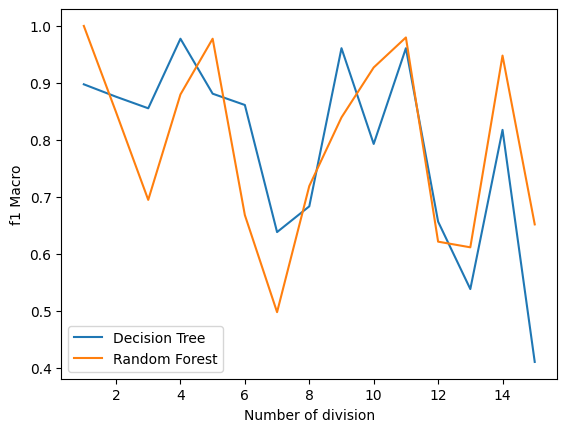

In [62]:
#Código para mostrar la comparación de métricas de desempeño de las dos propuestas en tabla
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from matplotlib import pyplot

#kfold = kFold(n_splits = 15, random_state = 1, shuffle = True)
kfold = StratifiedKFold(n_splits = 15, random_state = 1, shuffle =True)

scoresdt = cross_val_score(dt, x_etest, y_test, cv=kfold, scoring='f1_macro')
pyplot.plot(range(1,16), scoresdt, label = 'Decision Tree')
pyplot.xlabel('Number of divisions')
pyplot.ylabel('f1 Macro')

scoresrf = cross_val_score(rf, x_etest, y_test, cv=kfold, scoring='f1_macro')
pyplot.plot(range(1, 16), scoresrf, label = 'Random Forest')
pyplot.xlabel('Number of division')
pyplot.ylabel('f1 Macro')

pyplot.legend(loc= 'best')
pyplot.show()

Construya un párrafo con los principales hallazgos.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

Realice en este espacio todo el análsis de resultados final incluyendo: ventajas y desventajas de cada modelo propuesto, Resultados comparados. Conclusiones objetivas y significantes con base a las diferentes métricas escogidas. Recomendaciones de mejora de las propuestas: 